In [1]:
import sys
import os

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from luxgiant_dstream.manhattan_type import draw_manhattan

In [6]:
import ipywidgets as widgets
from IPython.display import display
#
# Create interactive widgets for input
input_path = widgets.Text(
    value='',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

input_name = widgets.Text(
    value='',
    description='Name of GWAS summary file:',
    style={'description_width': 'initial'}
)

highlight = widgets.Text(
    value='',
    description='Name of file with SNPs to highlight:',
    style={'description_width': 'initial'}
)

annotate = widgets.Text(
    value='',
    description='Name of file with SNPs to annotate:',
    style={'description_width': 'initial'}
)

# Display the widgets
display(input_path, input_name, highlight, annotate)

# Function to get the text parameter values
def get_params():
    return input_path.value, input_name.value, highlight.value, annotate.value

Text(value='', description='Path to project folder:', style=TextStyle(description_width='initial'))

Text(value='', description='Name of GWAS summary file:', style=TextStyle(description_width='initial'))

Text(value='', description='Name of file with SNPs to highlight:', style=TextStyle(description_width='initial'…

Text(value='', description='Name of file with SNPs to annotate:', style=TextStyle(description_width='initial')…

In [13]:
# Use the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")
print(f"Parameter 4: {path_params[3]}")

Parameter 1: /home/luis/data/gwasResult/
Parameter 2: annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid
Parameter 3: table_lead_SNPS_GWAS_glm_logistic_final_paper
Parameter 4: table_lead_SNPS_GWAS_glm_logistic_final_paper


In [8]:
import pandas as pd

df_gwas = pd.read_csv(
    os.path.join(path_params[0], path_params[1]), sep='\t', usecols=['#CHROM', 'POS', 'ID', 'P']
)
df_gwas.head(10)

,#CHROM,POS,ID,P
0,1,727242,rs61769339,0.355696
1,1,727717,rs61769340,0.517232
2,1,730869,rs200188737,0.510707
3,1,732369,rs1315713498,0.741994
4,1,740738,rs146067153,0.816063
5,1,758377,rs546155830,0.800819
6,1,758443,rs61769351,0.500839
7,1,769257,rs142559957,0.174892
8,1,771265,rs74879860,0.259828
9,1,771516,rs868287850,0.082361


In [10]:
if path_params[2] is not None or path_params[2] != '':
    highlight_path = os.path.join(path_params[0], path_params[2])
    if os.path.exists(highlight_path):
        df_high = pd.read_csv(
            highlight_path, sep='\t'
        )
        to_highlight = df_high['SNP'].to_list()
        print(to_highlight[:10])
    else:
        print('Path to file with SNPs to highlight does not exist')
else:
    print('No file with SNPs to highlight')

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [11]:
if path_params[3] is not None or path_params[3] != '':
    annotate_path = os.path.join(path_params[0], path_params[3])
    if os.path.exists(annotate_path):
        df_anno = pd.read_csv(
            annotate_path, sep='\t'
        )
        to_annotate = df_anno['SNP'].to_list()
        print(to_annotate[:10])
    else:
        print('Path to file with SNPs to annotate does not exist')
else:
    print('No file with SNPs to annotate')

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


2024/10/25 09:57:52 Start to annotate variants with nearest gene name(s)...
2024/10/25 09:57:52  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/10/25 09:57:52  -Using user-provided gtf:/home/luis/CGE/luxgiant-dstream/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/10/25 09:57:52 Finished annotating variants with nearest gene name(s) successfully!


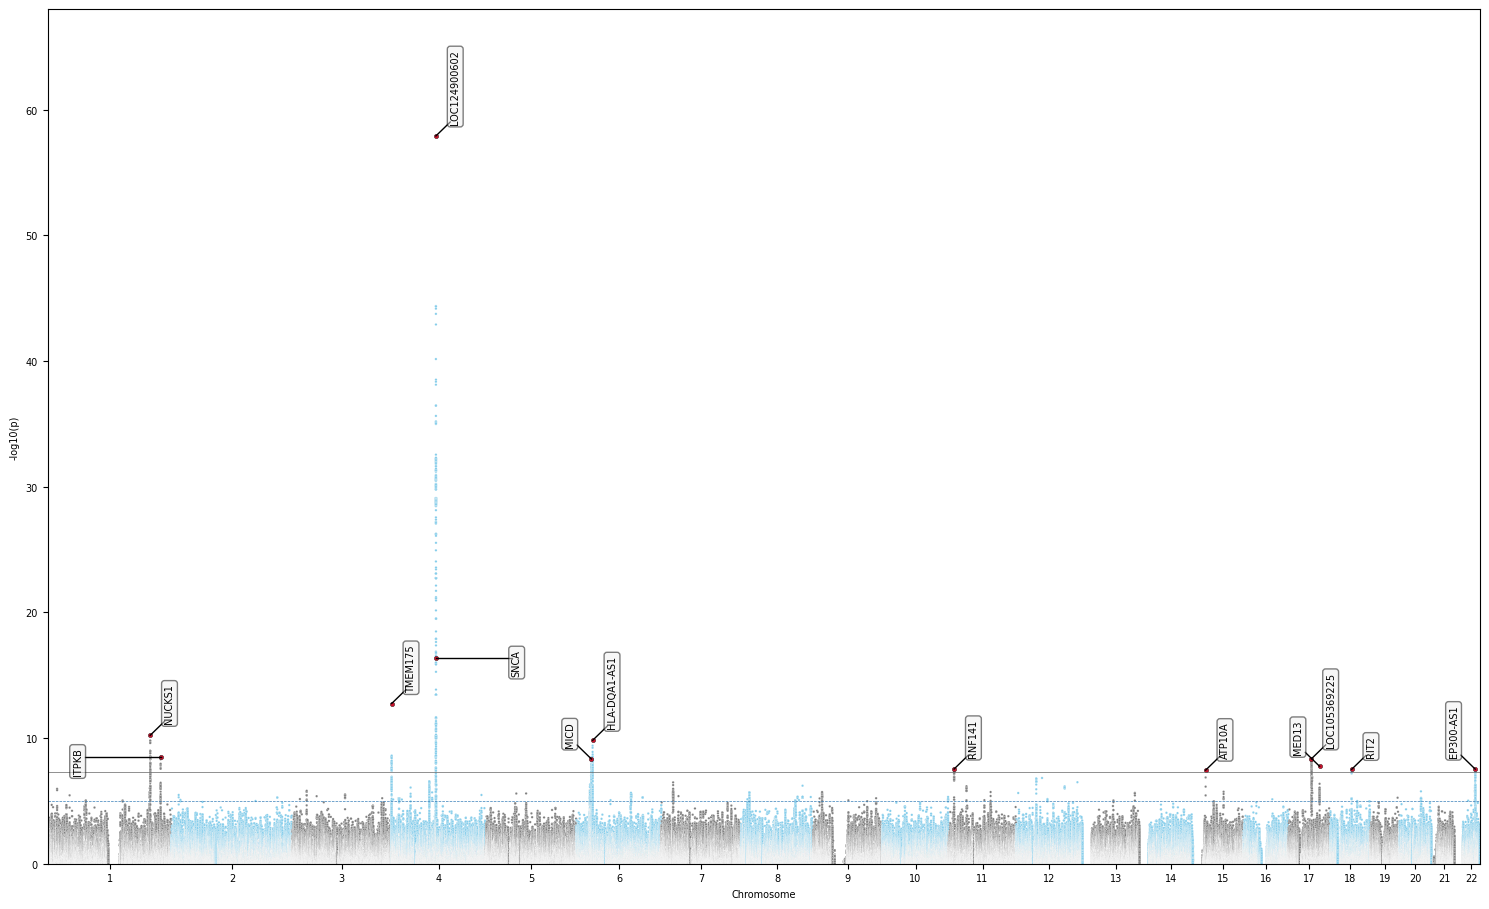

True

In [12]:
draw_manhattan(
    data_df     =df_gwas,
    chr_col     ='#CHROM',
    pos_col     ='POS',
    p_col       ='P',
    snp_col     ='ID',
    plot_dir    =path_params[0],
    to_highlight=to_highlight,
    to_annotate =to_annotate
)